In [1]:
bulk=read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.bulk_2021-03-23.csv',
              sep=',',header=TRUE,row.names=1)
head(bulk)

,SAMD11,HES4,ISG15,TMEM52,ERRFI1,ENO1,FBXO2,EFHD2,IFFO2,UBR4,⋯,CCT8,EVA1C,CBR3,ETS2,TFF1,PDXK,COL18A1,MT.ND1,MT.ND5,MT.ND6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A159P,0.006116119,-0.029372802,-0.019684520,-0.007480663,0.01576450,-0.008275788,0.01481168,0.036606420,-0.029212929,0.024079908,⋯,0.035932340,-0.03060763,7.714525e-02,-3.338039e-02,-0.005607895,-0.02755160,0.025616381,0.071494386,0.021951500,-0.03939999
A159V,-0.037336152,-0.017046064,-0.048094057,-0.041519258,-0.01524106,0.035167754,-0.02798360,0.019158430,0.004257792,0.027667779,⋯,0.009006022,0.02274114,-2.668172e-03,1.782838e-02,0.009261038,-0.05909770,-0.022698721,-0.059416249,-0.012544567,-0.03268207
A83V,0.017273922,0.009536999,0.018963875,0.037266321,-0.11075835,-0.090812802,0.07672974,-0.102054827,0.014105470,0.043884657,⋯,-0.061152268,-0.05711869,-6.109129e-02,9.056319e-05,0.073099449,0.09749632,0.046290640,-0.048311565,-0.089323565,0.01130738
C135F,-0.037742034,0.068181626,-0.007394775,0.070341475,0.04152031,0.111640066,0.02454255,0.054838672,0.004869973,-0.018566890,⋯,0.057048481,0.01176905,-2.989929e-03,-6.778588e-02,0.009372307,-0.03883984,0.015856232,-0.004511256,-0.002028174,-0.03012743
C135Y,0.025329988,-0.066074371,-0.039097939,-0.025775598,0.01832813,0.036488015,-0.02598919,-0.026009414,0.039553966,-0.095904306,⋯,0.026788272,-0.02536774,1.544226e-02,-2.292974e-02,-0.068099819,0.01461073,-0.052790262,-0.056962773,0.048084520,-0.07257902
C141Y,-0.015882779,0.016878944,-0.051204119,0.016979221,-0.02794949,-0.009545666,-0.06017869,-0.008848633,-0.029822456,-0.005488028,⋯,-0.057471428,-0.02943374,-9.438571e-05,4.682236e-03,0.029649619,-0.10850742,-0.005594695,0.047246374,0.053267378,-0.12489684


In [2]:
length(rownames(bulk))

[1] 100

In [3]:
rownames(bulk)

[1] "A159P"      "A159V"      "A83V"       "C135F"      "C135Y"     
  [6] "C141Y"      "C176F"      "C176Y"      "C238F"      "C238Y"     
 [11] "C242F"      "C275F"      "C275Y"      "C277F"      "D21D"      
 [16] "E271K"      "E285K"      "E286K"      "E2E"        "E339K"     
 [21] "G105C"      "G154V"      "G244C"      "G245C"      "G245D"     
 [26] "G245S"      "G245V"      "G266E"      "G266R"      "G266V"     
 [31] "G360V"      "H179R"      "H179Y"      "H193L"      "H193R"     
 [36] "H193Y"      "H214R"      "I195T"      "K132N"      "K132R"     
 [41] "L194R"      "L344L"      "M237I"      "M246V"      "P151S"     
 [46] "P152L"      "P153P"      "P222P"      "P250L"      "P278L"     
 [51] "P278S"      "P295P"      "P301P"      "P359P"      "P36P"      
 [56] "P47P"       "P47S"       "P58R"       "Q5R"        "R110L"     
 [61] "R158H"      "R158L"      "R158R"      "R175H"      "R213Q"     
 [66] "R248L"      "R248W"      "R249M"      "R249S"      "R273C"     
 [71] "R273H"      "R273L"      "R280K"      "R280T"      "R282W"     
 [76] "R337C"      "R337L"      "S127F"      "S241C"      "S241F"     
 [81] "S366A"      "T118T"      "T170T"      "T312S"      "V157F"     
 [86] "V173L"      "V173M"      "V216M"      "V216V"      "V272L"     
 [91] "V272M"      "V31I"       "WT"         "Y107H"      "Y163C"     
 [96] "Y205C"      "Y220C"      "Y234C"      "Y236C"      "unassigned"

In [4]:
scores_init=read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/scores/scores.iter0.cells1000.cells.csv',
                 sep=',',header=TRUE,row.names=1)
print(head(scores_init))
scores_init=scores_init[rownames(bulk),]
scores=data.frame(score=as.numeric(as.character(scores_init[,'HotellingT2.mean'])))
rownames(scores)=rownames(scores_init)
colnames(scores)='score'
head(scores)

           avg.pearson.mean avg.pearson.ci.0.95.low avg.pearson.ci.0.95.high
unassigned        0.7143097               0.6930125                0.7356070
V173M             1.5272102               1.5110672                1.5433532
P47S              0.2883962               0.2743150                0.3024775
P152L             0.9472920               0.9285154                0.9660685
C176Y             1.4223766               1.4078312                1.4369219
A159V             1.2537809               1.2366280                1.2709338
           avg.pearson.q HotellingT2.mean HotellingT2.ci.0.95.low
unassigned     0.0000100        166.61347                154.3568
V173M          0.0000100        373.06992                347.9481
P47S           0.4444444         35.88653                 31.6919
P152L          0.0000100        117.25527                107.1225
C176Y          0.0000100        246.05562                229.4703
A159V          0.0000100        243.71898                223.4442

,score
,<dbl>
A159P,297.76324
A159V,243.71898
A83V,27.13201
C135F,372.47017
C135Y,315.90149
C141Y,276.32748


In [5]:
scores['P36P',]

[1] 29.11526

In [6]:
bulk_corr=cor(t(bulk),method='spearman')

In [7]:
x=bulk_corr
hc <- hclust(dist(x,method='manhattan'),method='complete')

In [8]:
options(repr.plot.width=20, repr.plot.height=4)

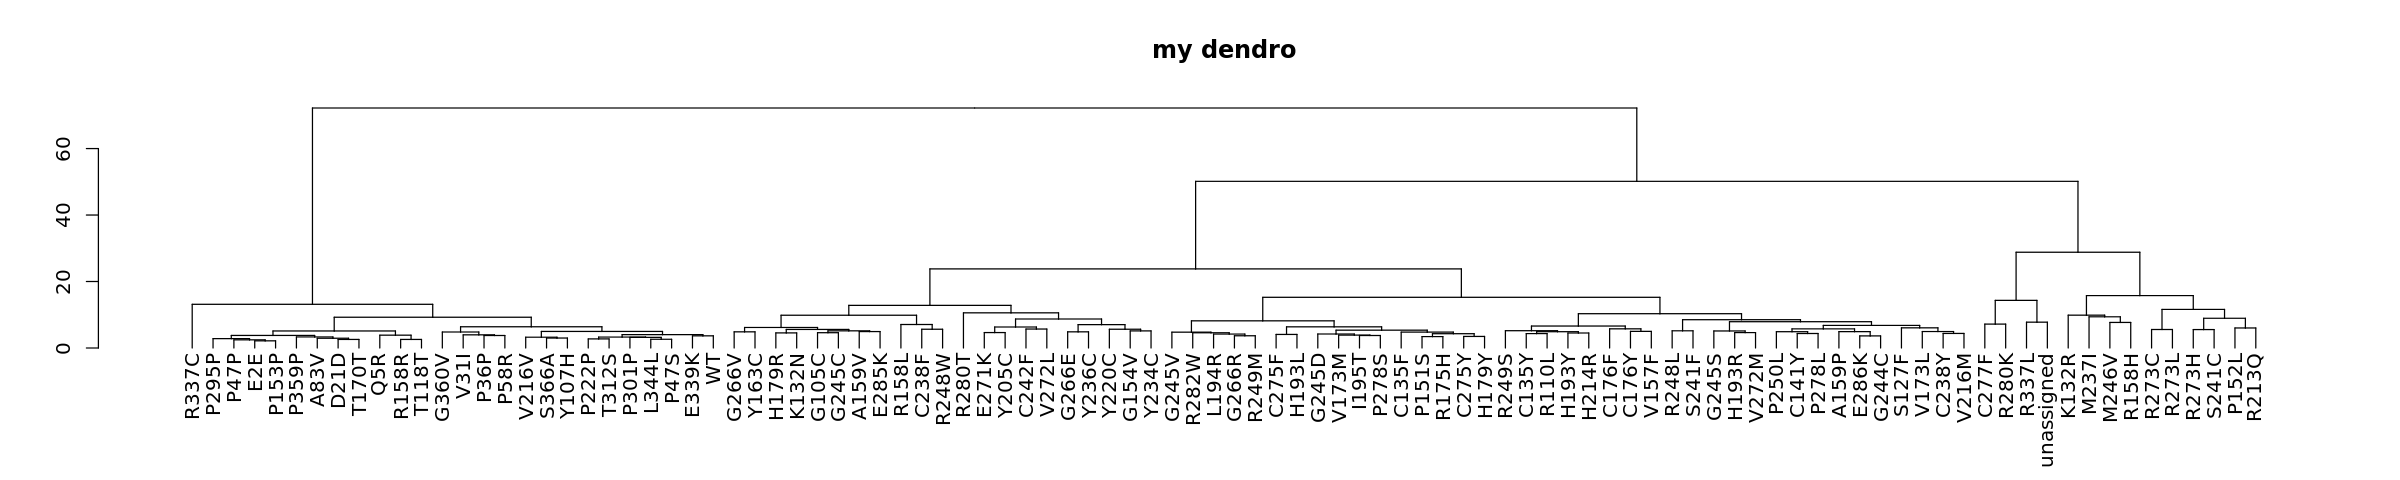

In [9]:
dd <- as.dendrogram(hc)
plot(dd, main = "my dendro")

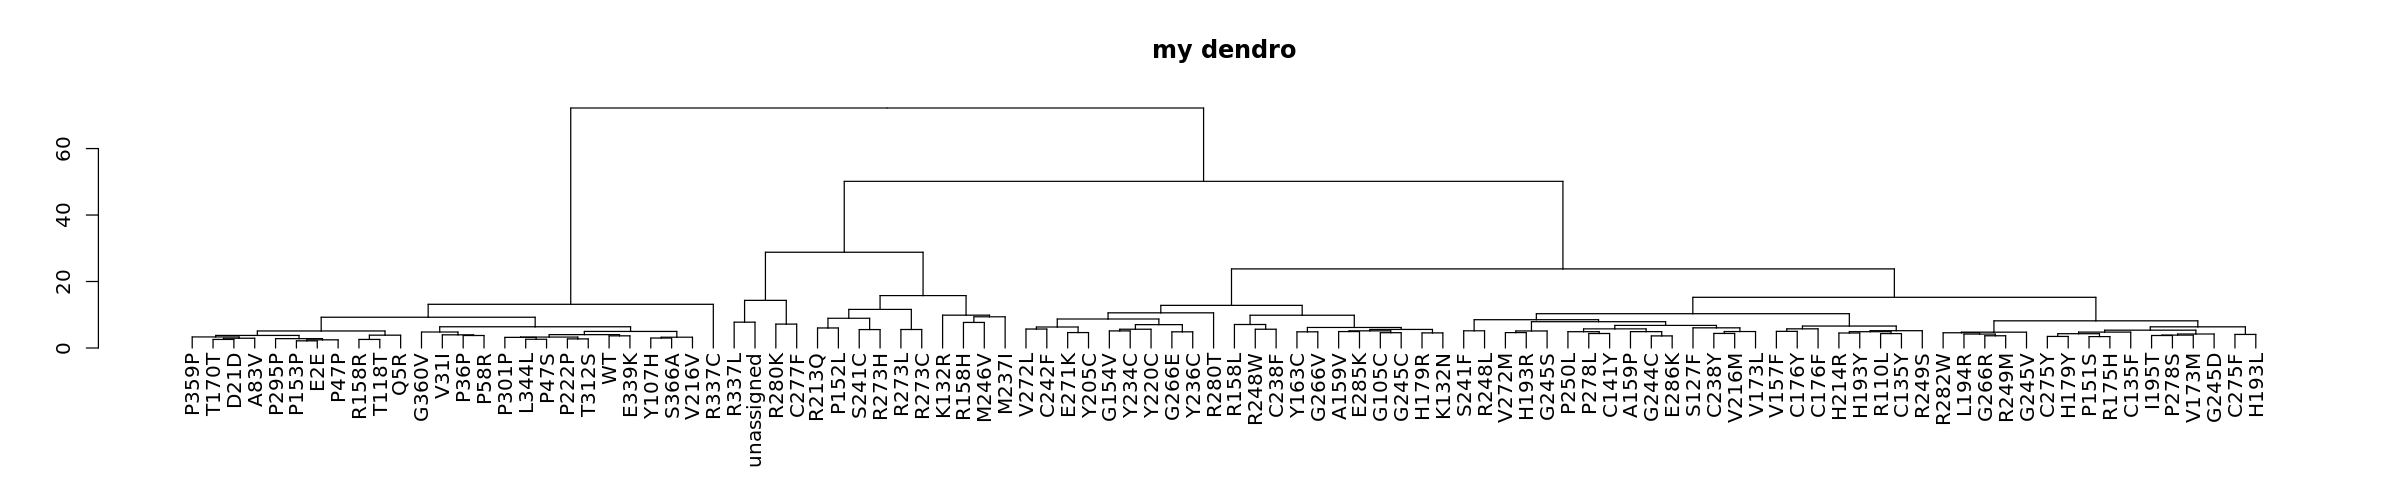

In [10]:
dd.reorder <- reorder(dd, wts=scores[rownames(x),'score'],agglo.FUN = mean)
plot(dd.reorder, main = "my dendro")

In [11]:
require(dendextend)

Loading required package: dendextend


---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree




In [12]:
dend <- color_branches(dd.reorder, k=3) 

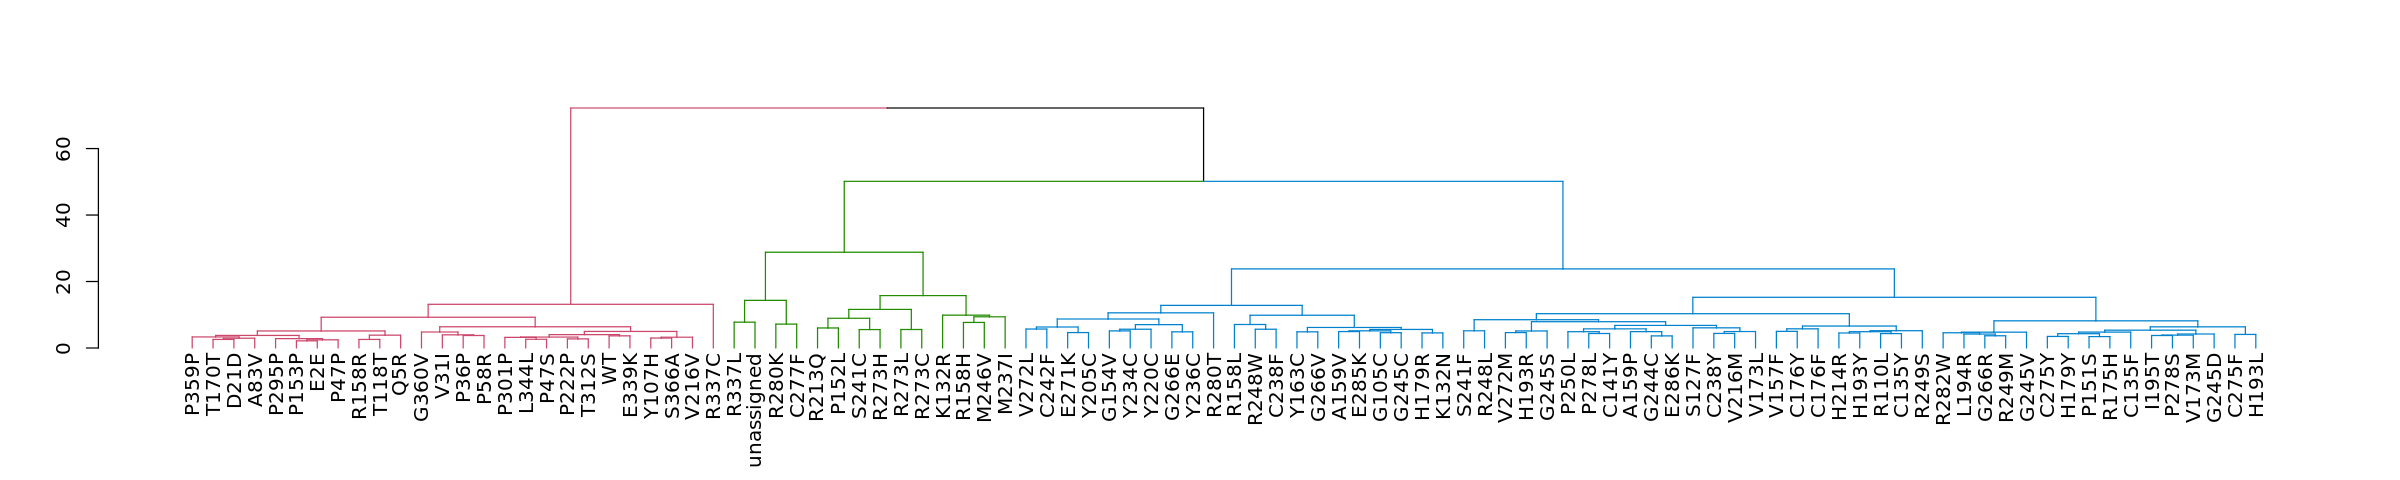

In [13]:
plot(dend,col=c('black','lightblue','blue'))

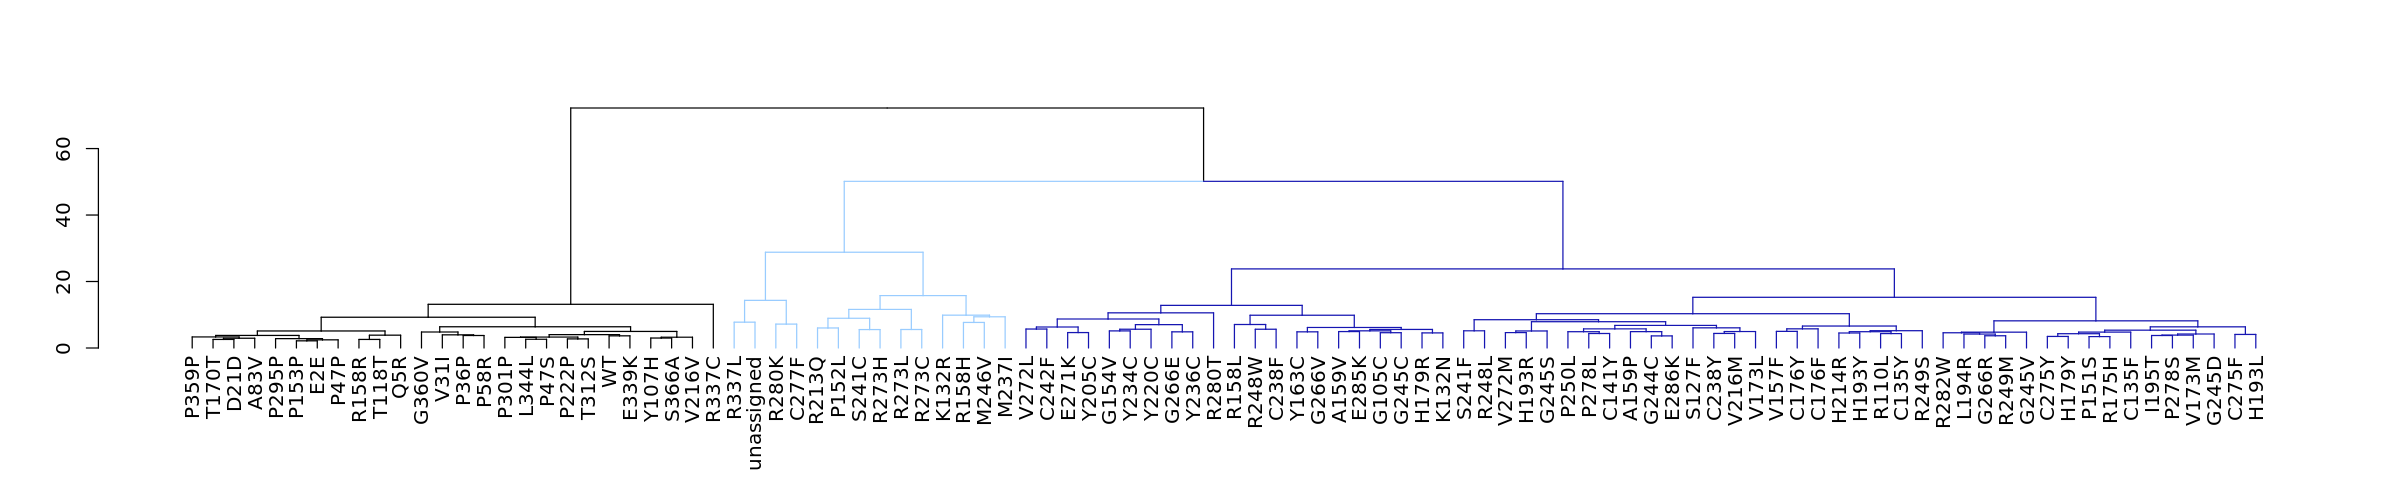

In [14]:
options(repr.plot.width=20, repr.plot.height=4)
d1 <- color_branches(dend, 3, col = c('black','#99CCFF','#1616B2'))
plot(d1)

In [15]:
options(repr.plot.width=20, repr.plot.height=4)
f_pref='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/TP53'
pdf(paste(f_pref,'.dendrogram.pdf',sep=''),width=20,height=4)
d1 <- color_branches(dend, 3, col = c('black','#99CCFF','#1616B2'))
print(plot(d1))
dev.off()
print(paste(f_pref,'.dendrogram.pdf',sep=''))

NULL


png 
  2

[1] "/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/TP53.dendrogram.pdf"


In [16]:
par('mar')
par(mar=c(1,1,1,1))

[1] 5.1 4.1 4.1 2.1

In [17]:
dev.off()
f_pref='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/TP53'
png(paste(f_pref,'.dendrogram.png',sep=''),width=1,height=1)
d1 <- color_branches(dend, 3, col = c('black','#99CCFF','navy'))
print(plot(d1))
dev.off()
print(paste(f_pref,'.dendrogram.png',sep=''))

null device 
          1

ERROR: Error in plot.new(): figure margins too large


In [18]:
png()
dev.off()

png 
  2

In [19]:
sorted_variants=rownames(x)[order.dendrogram(dend)]
sorted_variants_df=data.frame(variant=sorted_variants,
                              color=get_leaves_branches_col(d1))

In [20]:
res='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.corrL1.sorted_variants_2021-03-23.csv'
write.table(sorted_variants_df,res,sep=',',quote=FALSE,row.names=FALSE,col.names=FALSE)